# fashion MNIST Data Classification project




#step 1) import Libraries


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras

#step 2) Load data

In [ ]:
(X_train, y_train), (X_test, y_test)=tf.keras.datasets.fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# Print the shape of data

In [ ]:
X_train.shape,y_train.shape, "***************" , X_test.shape,y_test.shape

((60000, 28, 28), (60000,), '***************', (10000, 28, 28), (10000,))

In [ ]:

X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [ ]:

y_train[0]

9

In [ ]:
class_labels = [	"T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt",	"Sneaker",	"Bag",	"Ankle boot"]


In [ ]:
class_labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
#show image

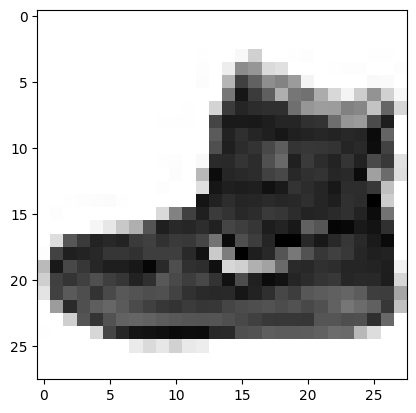

In [ ]:
plt.imshow(X_train[0],cmap='Greys')

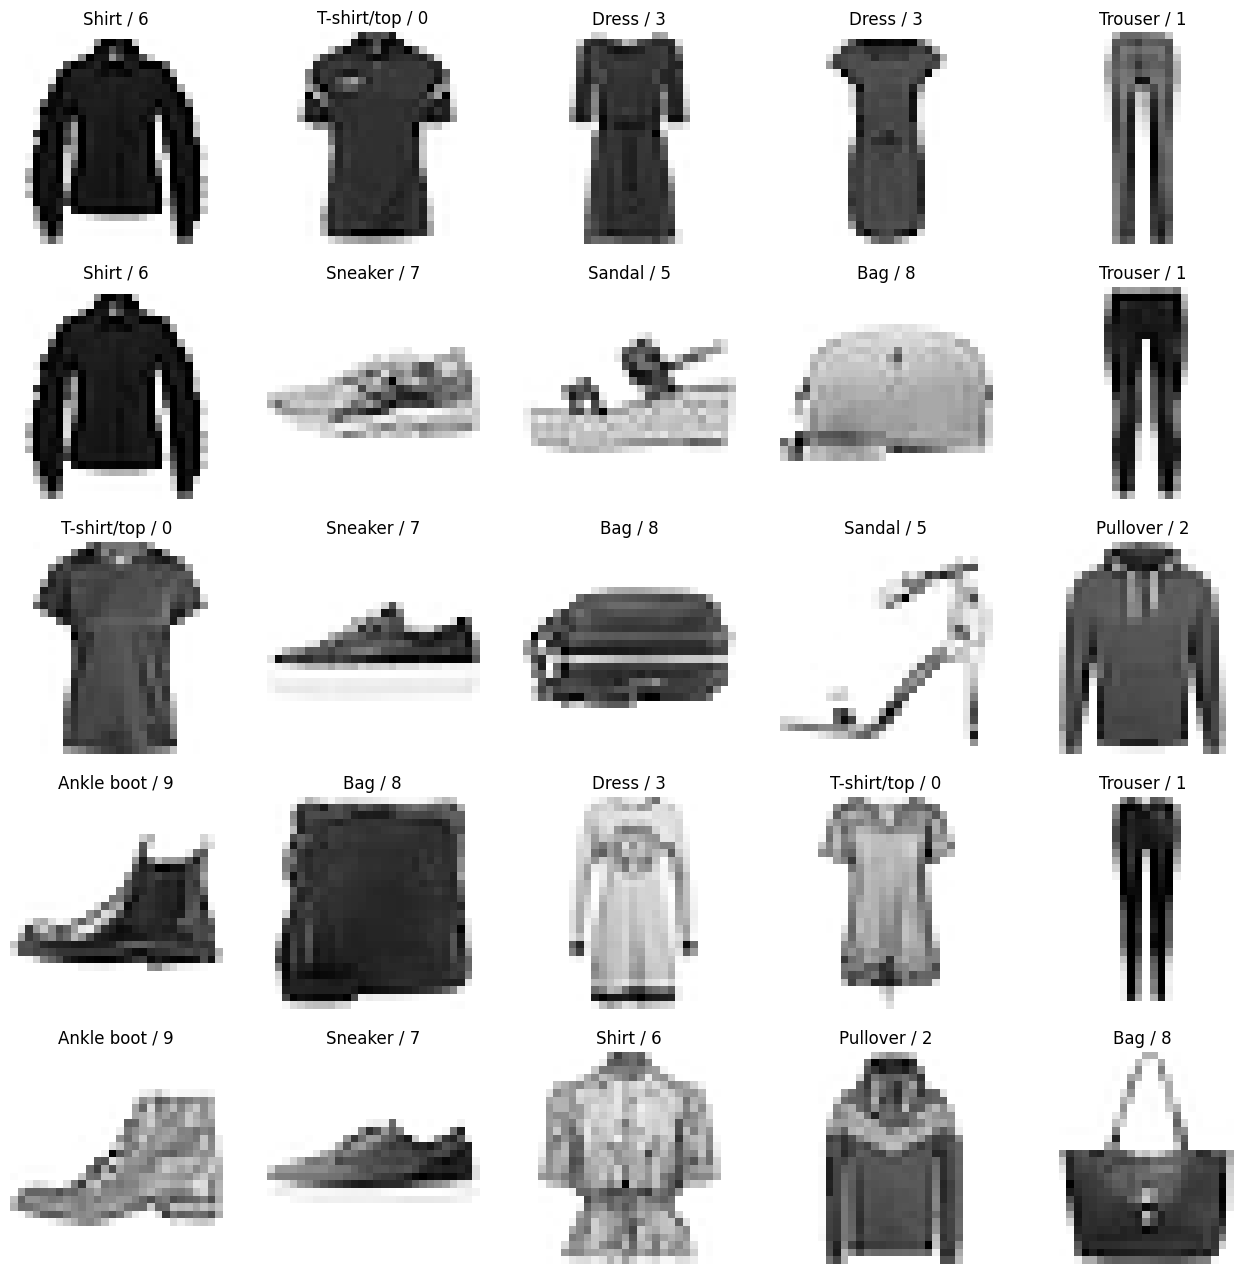

In [ ]:
plt.figure(figsize=(16,16))

j=1
for  i in np.random.randint(0,1000,25):
  plt.subplot(5,5,j);j+=1
  plt.imshow(X_train[i],cmap='Greys')
  plt.axis('off')
  plt.title('{} / {}'.format(class_labels[y_train[i]],y_train[i]))

In [ ]:

X_train.ndim


3

In [ ]:

X_train = np.expand_dims(X_train,-1)

In [ ]:
X_train.ndim

4

In [ ]:
X_test=np.expand_dims(X_test,-1)

In [ ]:
# feature scaling

In [ ]:

X_train = X_train/255
X_test= X_test/255


In [ ]:
 # split dataset

In [ ]:
from sklearn.model_selection import  train_test_split
X_train,X_Validation,y_train,y_Validation=train_test_split(X_train,y_train,test_size=0.2,random_state=2020)

In [ ]:
X_train.shape,X_Validation.shape,y_train.shape,y_Validation.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000,), (12000,))

#Step 3) building the CNN model

In [ ]:
model=keras.models.Sequential([
                         keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128,activation='relu'),
                         keras.layers.Dense(units=10,activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [ ]:
model.fit(X_train,y_train,epochs=10,batch_size=512,verbose=1,validation_data=(X_Validation,y_Validation))

Epoch 1/10
94/94 [==============================] - 34s 347ms/step - loss: 0.6645 - accuracy: 0.7687 - val_loss: 0.4374 - val_accuracy: 0.8497
Epoch 2/10
94/94 [==============================] - 30s 317ms/step - loss: 0.3961 - accuracy: 0.8616 - val_loss: 0.3768 - val_accuracy: 0.8670
Epoch 3/10
94/94 [==============================] - 29s 311ms/step - loss: 0.3451 - accuracy: 0.8782 - val_loss: 0.3385 - val_accuracy: 0.8817
Epoch 4/10
94/94 [==============================] - 32s 339ms/step - loss: 0.3109 - accuracy: 0.8897 - val_loss: 0.3241 - val_accuracy: 0.8853
Epoch 5/10
94/94 [==============================] - 40s 429ms/step - loss: 0.2893 - accuracy: 0.8977 - val_loss: 0.3157 - val_accuracy: 0.8890
Epoch 6/10
94/94 [==============================] - 31s 330ms/step - loss: 0.2726 - accuracy: 0.9032 - val_loss: 0.2912 - val_accuracy: 0.8982
Epoch 7/10
94/94 [==============================] - 31s 327ms/step - loss: 0.2564 - accuracy: 0.9085 - val_loss: 0.2949 - val_accuracy: 0.8934

In [ ]:
y_pred = model.predict(X_test)
y_pred.round(2)

313/313 [==============================] - 3s 9ms/step


array([[0.  , 0.  , 0.  , ..., 0.02, 0.  , 0.98],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.99, 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.01, ..., 0.21, 0.11, 0.  ]], dtype=float32)

In [ ]:

y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 3s 11ms/step - loss: 0.2734 - accuracy: 0.8977


[0.27343088388442993, 0.8977000117301941]

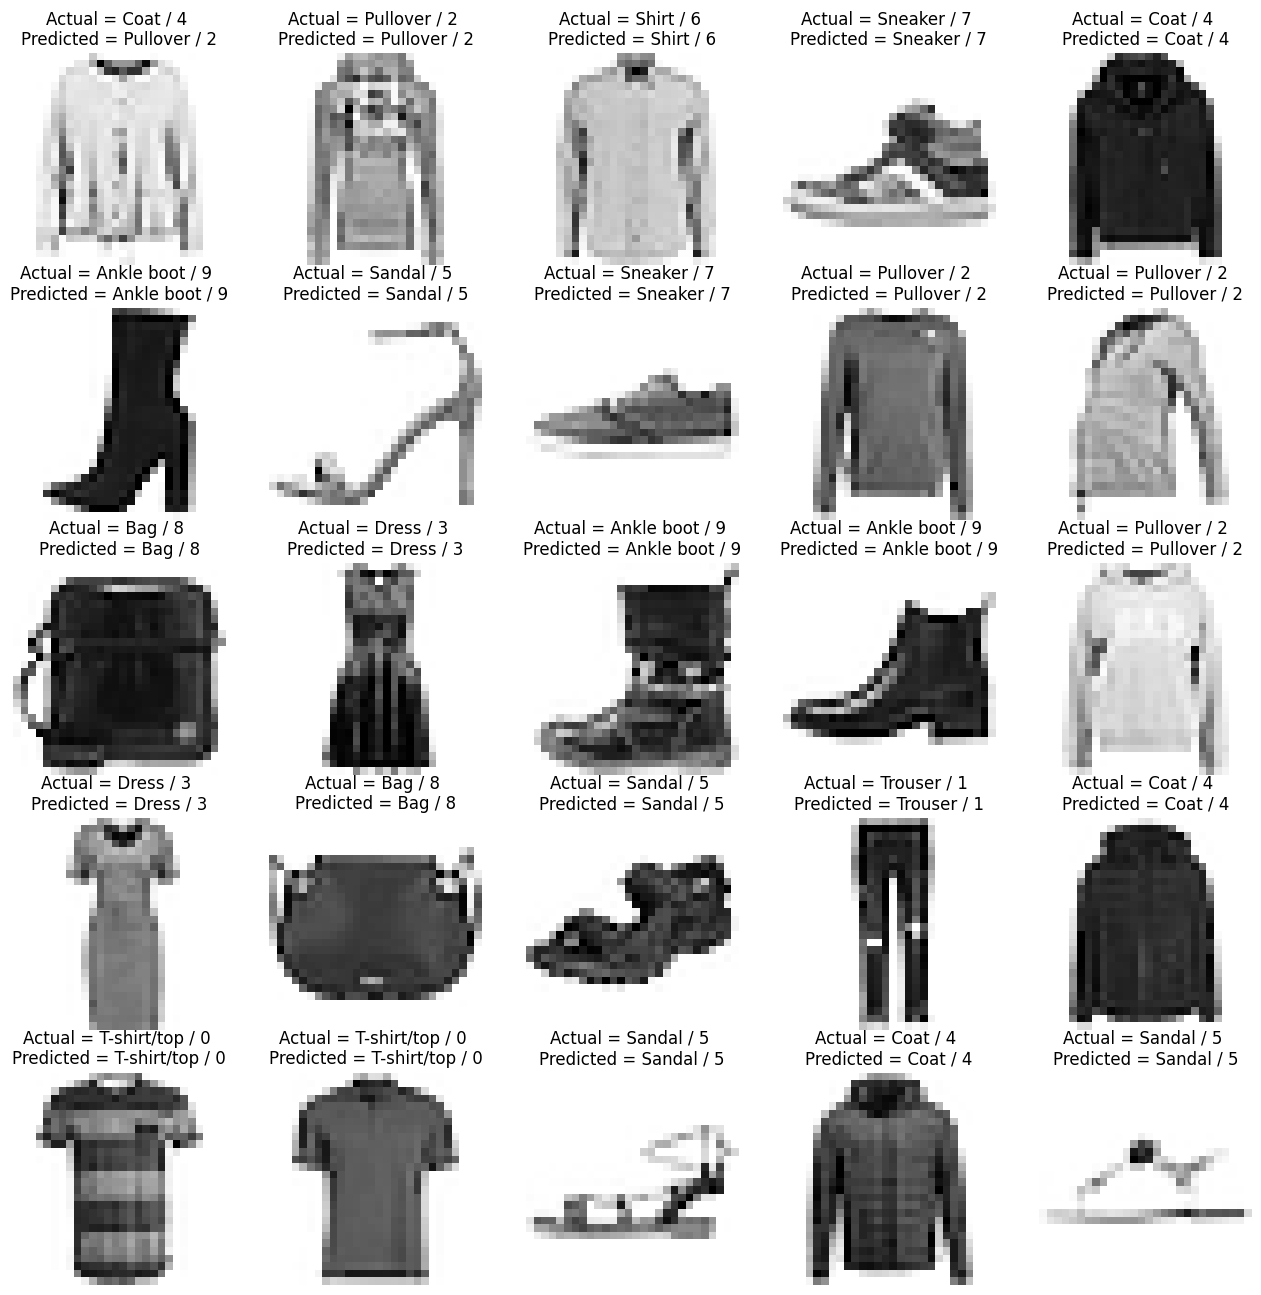

In [ ]:
plt.figure(figsize=(16,16))

j=1
for i in np.random.randint(0, 1000,25):
  plt.subplot(5,5, j); j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

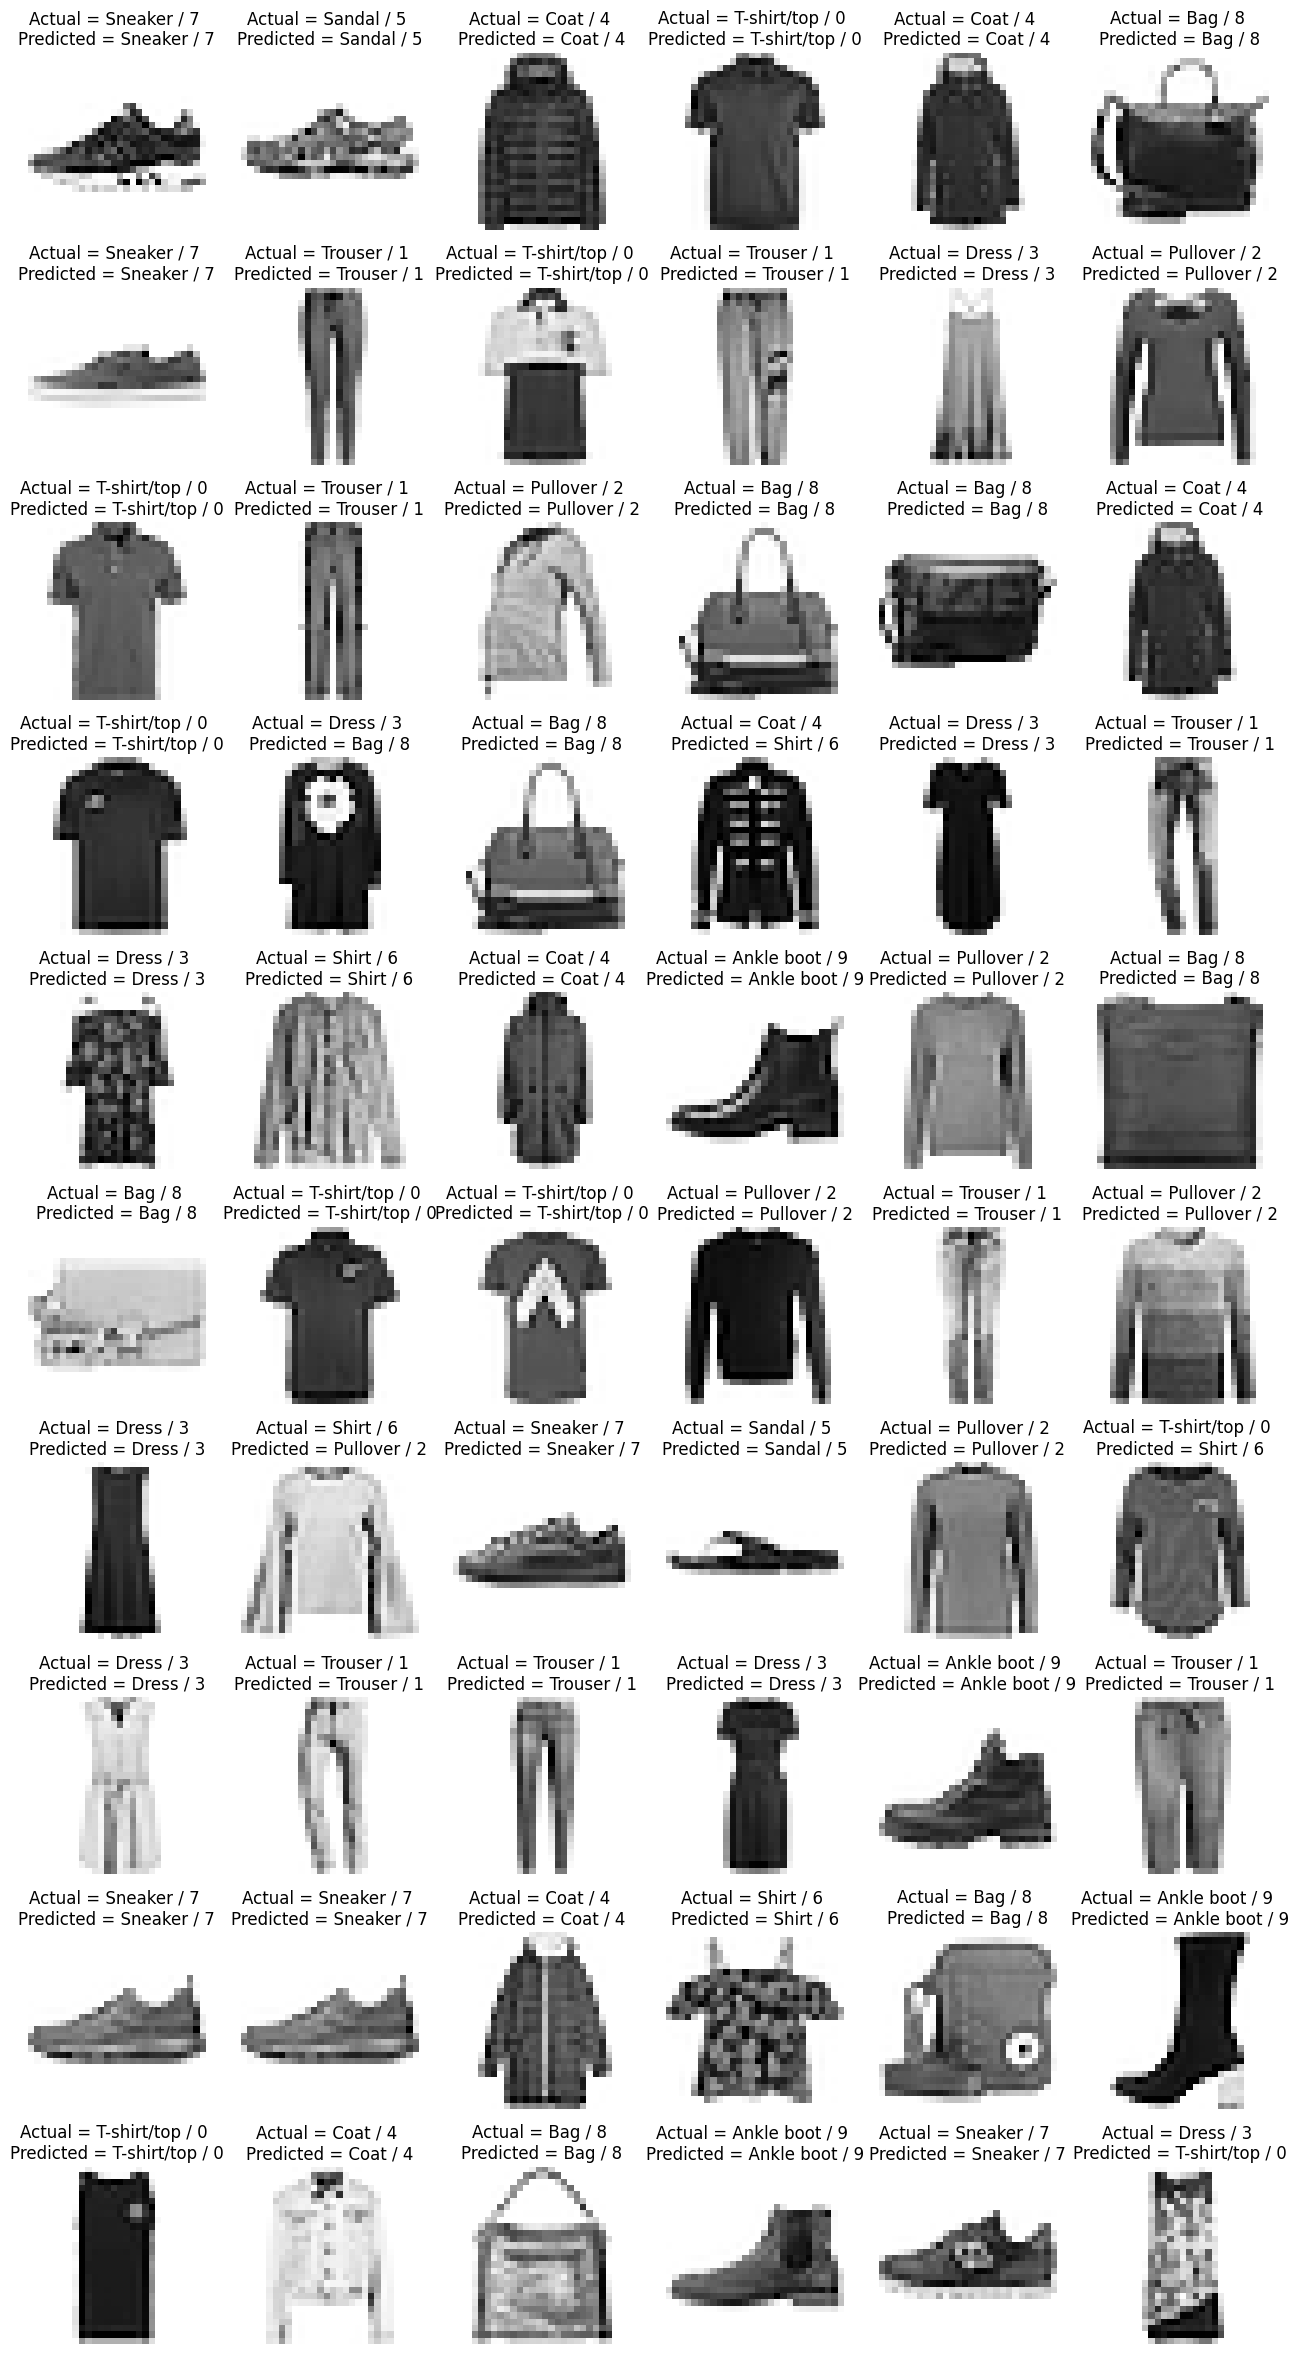

In [ ]:
plt.figure(figsize=(16,30))

j=1
for i in np.random.randint(0, 1000,60):
  plt.subplot(10,6, j); j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

In [ ]:
"""## Confusion Matrix"""

'## Confusion Matrix'

In [ ]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))
y_pred_labels = [ np.argmax(label) for label in y_pred ]
cm = confusion_matrix(y_test, y_pred_labels)

<Figure size 1600x900 with 0 Axes>

              precision    recall  f1-score   support

 T-shirt/top       0.83      0.86      0.85      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.83      0.84      0.84      1000
       Dress       0.88      0.91      0.89      1000
        Coat       0.86      0.81      0.83      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.73      0.70      0.71      1000
     Sneaker       0.95      0.96      0.95      1000
         Bag       0.96      0.98      0.97      1000
  Ankle boot       0.96      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



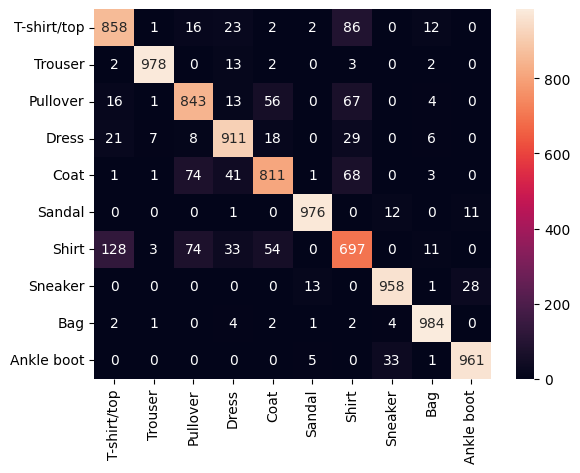

In [ ]:
sns.heatmap(cm, annot=True, fmt='d',xticklabels=class_labels, yticklabels=class_labels)

from sklearn.metrics import classification_report
cr= classification_report(y_test, y_pred_labels, target_names=class_labels)
print(cr)

In [ ]:
"""# Save Model"""

'# Save Model'

In [ ]:
model.save('fashion_mnist_cnn_model.h5')

# Build 2 complex CNN

In [ ]:
#Building CNN model
cnn_model2 = keras.models.Sequential([
                         keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dense(units=10, activation='softmax')
                         ])

# complie the model
cnn_model2.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

#Train the Model
cnn_model2.fit(X_train, y_train, epochs=20, batch_size=512, verbose=1, validation_data=(X_Validation, y_Validation))

cnn_model2.save('fashion_mnist_cnn_model2.h5')

"""######## very complex model"""

#Building CNN model
cnn_model3 = keras.models.Sequential([
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=128, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.5),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.10),
                         keras.layers.Dense(units=10, activation='softmax')
                         ])

# complie the model
cnn_model3.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

#Train the Model
cnn_model3.fit(X_train, y_train, epochs=50, batch_size=512, verbose=1, validation_data=(X_Validation, y_Validation))

cnn_model3.save('fashion_mnist_cnn_model3.h5')


"""######## very complex model"""

#Building CNN model
cnn_model3 = keras.models.Sequential([
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=128, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.5),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.10),
                         keras.layers.Dense(units=10, activation='softmax')
                         ])

# complie the model
cnn_model3.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

#Train the Model
cnn_model3.fit(X_train, y_train, epochs=50, batch_size=512, verbose=1, validation_data=(X_Validation, y_Validation))

cnn_model3.save('fashion_mnist_cnn_model3.h5')

cnn_model3.evaluate(X_test, y_test)

Epoch 1/20
94/94 [==============================] - 37s 381ms/step - loss: 1.0166 - accuracy: 0.6240 - val_loss: 0.5825 - val_accuracy: 0.7776
Epoch 2/20
94/94 [==============================] - 33s 355ms/step - loss: 0.5440 - accuracy: 0.7938 - val_loss: 0.4811 - val_accuracy: 0.8135
Epoch 3/20
94/94 [==============================] - 32s 344ms/step - loss: 0.4582 - accuracy: 0.8312 - val_loss: 0.3987 - val_accuracy: 0.8519
Epoch 4/20
94/94 [==============================] - 34s 359ms/step - loss: 0.4049 - accuracy: 0.8519 - val_loss: 0.3679 - val_accuracy: 0.8662
Epoch 5/20
94/94 [==============================] - 32s 340ms/step - loss: 0.3666 - accuracy: 0.8667 - val_loss: 0.3461 - val_accuracy: 0.8728
Epoch 6/20
94/94 [==============================] - 34s 364ms/step - loss: 0.3467 - accuracy: 0.8744 - val_loss: 0.3436 - val_accuracy: 0.8742
Epoch 7/20
94/94 [==============================] - 32s 344ms/step - loss: 0.3284 - accuracy: 0.8784 - val_loss: 0.3215 - val_accuracy: 0.8819